In [ ]:
!pip install --user -U nltk

     |████████████████████████████████| 1.5 MB 7.9 MB/s 
     |████████████████████████████████| 749 kB 54.3 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
%matplotlib inline
import nltk
import re
nltk.download('punkt')



with open('/content/03.txt') as t:
    text = [l.strip() for l in t]
print(text[100])

text = [t.lower() for t in text][:-10]
print(len(text))

regexp = re.compile(r'chapter \d')
text = [t for t in text if not re.match(regexp, t)]


raw = ' '.join(text)


tokens = [t for t in nltk.word_tokenize(raw) if t not in (',', '“', '”', '"')]


distinct_tokens = set(tokens)
lexical_richness = len(distinct_tokens) / len(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
understanding, as, indeed, with the indifferent maketh it indifferent,
29271


In [ ]:
freq = nltk.FreqDist(tokens)
print(freq.most_common(200))

[('the', 22778), ('and', 17192), ('of', 16662), ('.', 13129), ('to', 6182), ('that', 5469), ('in', 5403), ('with', 4654), ('o', 3996), ('a', 3885), ('by', 3815), ('is', 3420), ('his', 2987), ('thou', 2633), ('i', 2366), ('all', 2146), ('!', 2111), ('this', 2083), ('he', 1940), ('king', 1908), ('as', 1847), ('for', 1766), ("'", 1760), ('on', 1672), ('one', 1669), ('it', 1587), ('be', 1463), ('not', 1441), ('(', 1433), (')', 1433), ('was', 1415), ('said', 1406), ('from', 1366), ('him', 1316), ('thy', 1314), ('son', 1280), ('thee', 1275), ('at', 1260), ('then', 1242), ('my', 1236), ('their', 1230), ('are', 1200), ('me', 1178), ('those', 1142), ('have', 1097), ('there', 1064), ('who', 1062), ('also', 1047), ("'s", 1032), ('unto', 1017), ('having', 990), ('will', 971), ('had', 967), ('they', 965), ('great', 929), ('``', 879), ('?', 877), ('men', 874), ('like', 874), (';', 865), ('do', 845), ('them', 837), ('these', 836), ('her', 785), ('been', 719), ('or', 667), ('thus', 664), ('--', 664), 

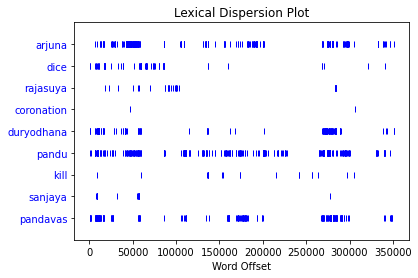

In [ ]:
ntext = nltk.Text(tokens)
ntext.dispersion_plot(['arjuna', 'dice', 'rajasuya', 'coronation',  'duryodhana', 'pandu', 'kill', 'sanjaya', 'pandavas'])

In [ ]:
import random
print(', '.join([w for w in random.sample(freq.hapaxes(), 40)]))

alleviated, prajapatyaka, ratis, outspread, l, eleventh, spouses, xxvii, fructify, pegs, sravasthi, globur, rot, kshapa, ccxiii, clxiv, pedantic, uta, sindhuvars, grand-sire, xx, fair-faced, teacher, re-appeareth, ransacked, gripped, adhivanga, rind, beats, chronology, toy, etiquette, manwantaras, damaghosha, besprinkle, trimmed, malava, speeding, nanku, miss


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
# stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
ntext.collocations(window_size=3)

thou art; thou hast; among men; sons pandu; vaisampayana continued;
bharata race; thus addressed; tiger among; three worlds; like unto;
kuru race; vaisampayana said; hearing words; thou wilt; obtaineth
merit; tirtha called; son kunti; behoveth thee; markandeya continued;
thousand kine


In [ ]:
%matplotlib inline
import re
import nltk


def build_regexp(c):
    """
    Creates the appropriate regex for the expressions
    N(M) or N,M
    """
    if '(' in c:
        a, b = c.split(' ')
        b = b[1:-1]
        r = r"{}( {})?".format(a, b)
        return r
    if ',' in c:
        a, b = c.split(',')
        r = r"({}|{})".format(a, b)
        return r    
    return r"{}".format(c)


## save everything
with open('/content/top_15_close.txt') as x:
    characters = [l.strip() for l in x]

with open('/content/merge_from_ofoct (1).txt') as x:
    text = [l.strip() for l in x]
raw = ' '.join(text)

## map the characters
chars = {}

for it, c in enumerate(characters):
    chars[it] = c    
    template = '{}'.format(it)
    regexp = re.compile(build_regexp(c))
    raw = re.sub(regexp, template, raw)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import networkx as nx

print('Total characters:', len(characters))

# build the graph
g = nx.Graph()
# add nodes
for c in characters:
    g.add_node(c)

# tokenize the text
words = [n for n in nltk.word_tokenize(raw) if n != ',' and n != '.']

# utils list
characters_rep = [str(i) for i in range(len(characters))]

# forward threshold
fwd_t = 30
# check for each character
for it, c in enumerate(characters):
    for i, word in enumerate(words):
        if word == str(it):
          #identifying characters with relationships in the given spans
            for d in range(i, i + fwd_t + 1):
                if d < len(words):
                    if words[d] in characters_rep and words[d] != word:
                        src_node = chars[int(word)]
                        target_node = chars[int(words[d])]
                        if target_node not in g[src_node]:
                            g.add_edge(src_node, target_node, weight=1)
                        else:
                            g[src_node][target_node]['weight'] += 0.1

# # remove nodes w/o edges
# removed = set()
# for i in g.nodes():
#     if not g[node]:
#         print('Node w/o edges:', node)
#         g.remove_node(node)
#         removed.add(node)

# print('Total characters minus solitude nodes:', len(g.nodes()))

# nx.write_graphml(g, 'output.graphml')

Total characters: 15


In [ ]:
print(len(g))

1688


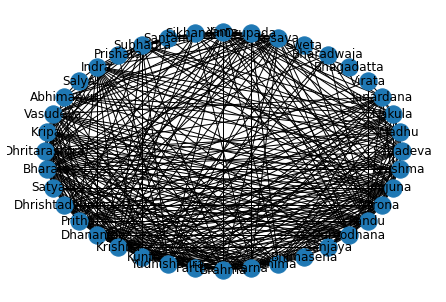

In [ ]:
nx.draw_circular(g, with_labels = True)

In [ ]:
# print('Diameter:', nx.diameter(g))
print('Degree centrality:', nx.degree_centrality(g))
print('Betweennes centrality:', nx.betweenness_centrality(g))
print('Closeness centrality:', nx.closeness_centrality(g))
#print('Pagerank:', nx.pagerank(g))

Degree centrality: {'Mriti-grahitaya': 0.0023710729104919974, 'Visalaksha': 0.06283343212803794, "'Pravadatam": 0.04919976289270895, 'Lohajvaktra': 0.06816834617664493, 'Kshemadhurti': 0.07705986959098991, 'Panchajanya': 0.08417308832246591, 'Vyaghraketu': 0.04090100770598695, 'Kanchanaksha': 0.05631298162418494, 'Padarakshan': 0.05453467694131594, 'Amaravati': 0.058684054534676934, 'Svastimati': 0.06935388263189092, 'Manthanika': 0.06520450503852993, "Dasarha's": 0.07765263781861291, 'Jarasandha': 0.13337285121517486, 'Dhriti': 0.06461173681090693, 'Sthanu-tirtha': 0.040308239478363955, 'Dwaita': 0.04801422643746295, 'Rama': 0.21517486662714877, 'Satyadeva': 0.02904564315352697, 'Visala': 0.04742145820983995, 'Bhanudatta': 0.03734439834024896, 'Sannati': 0.051570835803200946, 'Alamvusha': 0.06994665085951393, "Jaigishavya's": 0.033787788974510964, 'Vrishadansa': 0.02726733847065797, 'Praya': 0.034973325429756966, 'Ekata': 0.038529934795494956, 'Prajahi': 0.020154119739181978, 'Aswaket

In [ ]:
# # print('Diameter:', nx.diameter(g))
# print('Degree centrality:', nx.degree_centrality(g))
# print('Betweennes centrality:', nx.betweenness_centrality(g))
# print('Closeness centrality:', nx.closeness_centrality(g))
# #print('Pagerank:', nx.pagerank(g))

In [ ]:
closeness= nx.closeness_centrality(g)
close_top_chars = []

close_top_chars = dict(sorted(closeness.items(), key=lambda item: item[1]))

print(len(close_top_chars))

1688


In [ ]:
top_15_close = list(close_top_chars)[1673:]
print(top_15_close)


['Yama', 'Bhimasena', 'Duryodhana', 'Burdwan', 'Bhishma', 'Drona', 'Pandu', 'Karna', 'Bhima', 'Indra', 'Yudhishthira', 'Arjuna', 'Bharata', 'Krishna', 'Brahma']


In [ ]:
with open("top_15_close.txt", 'w') as f:
    f.write("\n".join(map(str, top_15_close)))

In [ ]:
%matplotlib inline
import re
import nltk


def build_regexp(c):
    """
    Creates the appropriate regex for the expressions
    N(M) or N,M
    """
    if '(' in c:
        a, b = c.split(' ')
        b = b[1:-1]
        r = r"{}( {})?".format(a, b)
        return r
    if ',' in c:
        a, b = c.split(',')
        r = r"({}|{})".format(a, b)
        return r    
    return r"{}".format(c)


## save everything
with open('/content/top_15_close.txt') as x:
    characters = [l.strip() for l in x]

with open('/content/merge_from_ofoct (1).txt') as x:
    text = [l.strip() for l in x]
raw = ' '.join(text)

## map the characters
chars = {}

for it, c in enumerate(characters):
    chars[it] = c    
    template = '{}'.format(it)
    regexp = re.compile(build_regexp(c))
    raw = re.sub(regexp, template, raw)

In [ ]:
import networkx as nx

print('Total characters:', len(characters))


g = nx.Graph()

for c in characters:
    g.add_node(c)


words = [n for n in nltk.word_tokenize(raw) if n != ',' and n != '.']


characters_rep = [str(i) for i in range(len(characters))]


fwd_t = 30

for it, c in enumerate(characters):
    for i, word in enumerate(words):
        if word == str(it):
            for d in range(i, i + fwd_t + 1):
                if d < len(words):
                    if words[d] in characters_rep and words[d] != word:
                        src_node = chars[int(word)]
                        target_node = chars[int(words[d])]
                        if target_node not in g[src_node]:
                            g.add_edge(src_node, target_node, weight=1)
                        else:
                            g[src_node][target_node]['weight'] += 1


Total characters: 15


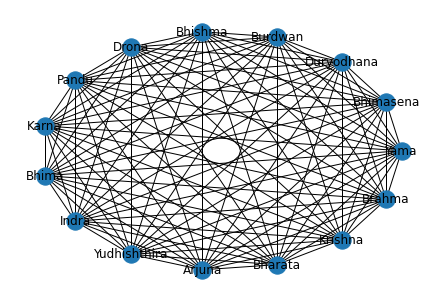

In [ ]:
nx.draw_circular(g, with_labels = True)

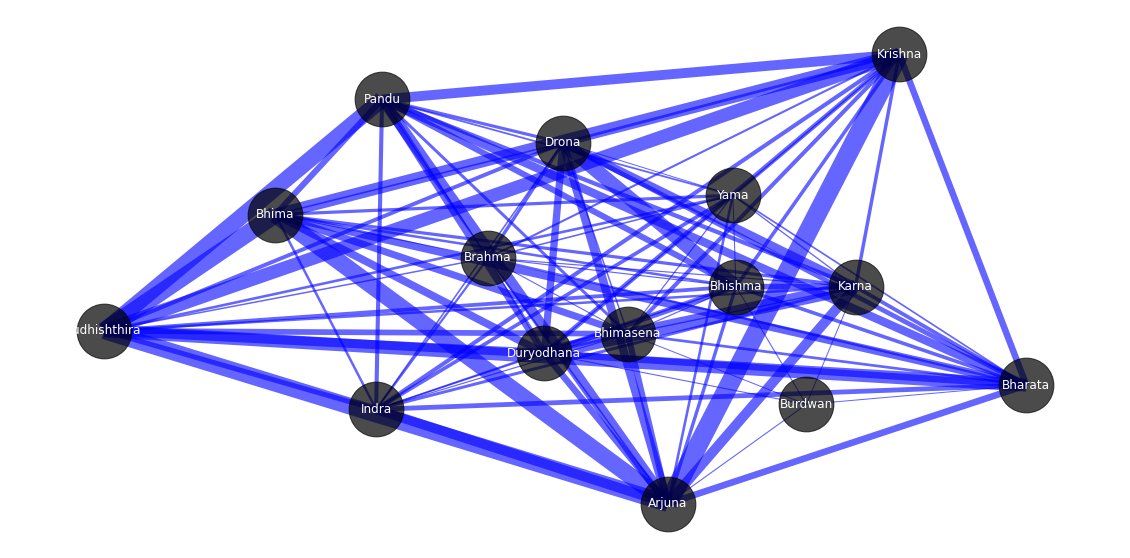

In [ ]:
import networkx as nx
from matplotlib import pyplot as plt

widths = nx.get_edge_attributes(g, 'weight')
nodelist = g.nodes()

plt.figure(figsize=(20,10))

pos = nx.kamada_kawai_layout(g)
nx.draw_networkx_nodes(g,pos,
                       nodelist=nodelist,
                       node_size=3000,
                       node_color='black',
                       alpha=0.7)
nx.draw_networkx_edges(g,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='blue',
                       alpha=0.6)
nx.draw_networkx_labels(g, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='white')
plt.box(False)
plt.show()

In [ ]:

# elarge = [(u, v) for (u, v, d) in g.edges(data=True) if d["weight"] > 0.5]
# esmall = [(u, v) for (u, v, d) in g.edges(data=True) if d["weight"] <= 0.5]

# pos = nx.spring_layout(g, seed=7)  # positions for all nodes - seed for reproducibility

# # nodes
# nx.draw_networkx_nodes(g, pos, node_size=700)

# # edges
# nx.draw_networkx_edges(g, pos, edgelist=elarge, width=6)
# nx.draw_networkx_edges(
#     g, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
# )

# # node labels
# nx.draw_networkx_labels(get_ipython, pos, font_size=20, font_family="sans-serif")
# # edge weight labels
# edge_labels = nx.get_edge_attributes(g, "weight")
# nx.draw_networkx_edge_labels(g, pos, edge_labels)

# ax = plt.gca()
# ax.margins(0.08)
# plt.axis("off")
# plt.tight_layout()
# plt.show()

In [ ]:
with open('top_chars.txt') as x:
    characters_freq = [l.strip() for l in x]

chars = {}

for it, c in enumerate(characters_freq):
    chars[it] = c    
    template = '{}'.format(it)
    regexp = re.compile(build_regexp(c))
    raw = re.sub(regexp, template, raw)

In [ ]:
# import networkx as nx

# print('Total characters:', len(characters))

# g = nx.Graph()

# for c in characters:
#     g.add_node(c)


# words = [n for n in nltk.word_tokenize(raw) if n != ',' and n != '.']

# characters_rep = [str(i) for i in range(len(characters))]


# fwd_t = 30

# for it, c in enumerate(characters):
#     for i, word in enumerate(words):
#         if word == str(it):
#             for d in range(i, i + fwd_t + 1):
#                 if d < len(words):
#                     if words[d] in characters_rep and words[d] != word:
#                         src_node = chars[int(word)]
#                         target_node = chars[int(words[d])]
#                         if target_node not in g[src_node]:
#                             g.add_edge(src_node, target_node, weight=1)
#                         else:
#                             g[src_node][target_node]['weight'] += 1


# removed = set()
# for node in list(g.nodes()):
#     if not g[node]:
#         print('Node w/o edges:', node)
#         g.remove_node(node)
#         removed.add(node)

# print('Total characters minus solitude nodes:', len(g.nodes()))
# print(g)
# nx.write_graphml(g, 'output.graphml')

In [ ]:
# nx.draw_spiral(g, with_labels = True)

In [ ]:
# chars = {}

# for it, c in enumerate(close_top_chars):
#     chars[it] = c    
#     template = '{}'.format(it)
#     regexp = re.compile(build_regexp(c))
#     raw = re.sub(regexp, template, raw)

In [ ]:
# nx.draw_spiral(g, with_labels = True)